Numerical features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical features: []

--- Checking Normality of Numerical Features ---


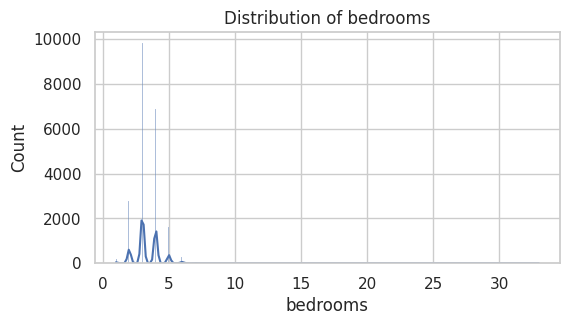

bedrooms: p = 0.000 => Non-normal


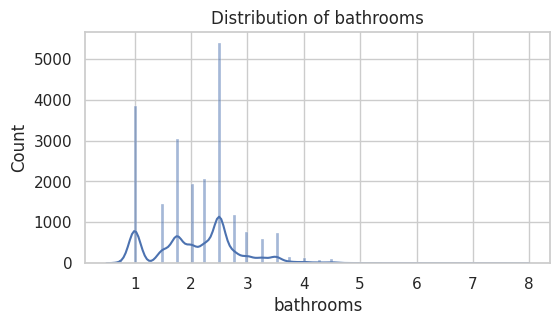

bathrooms: p = 0.000 => Non-normal


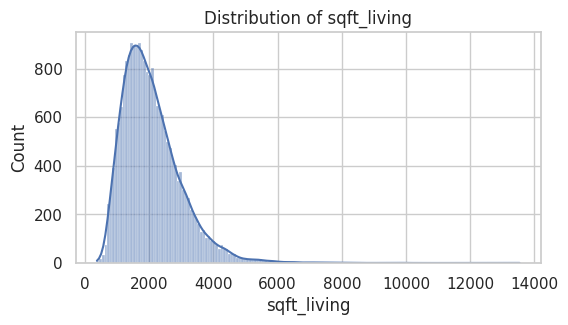

sqft_living: p = 0.000 => Non-normal


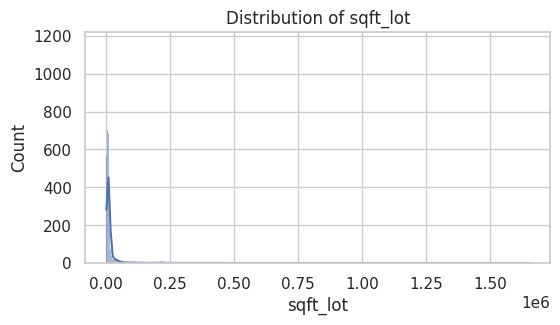

sqft_lot: p = 0.000 => Non-normal


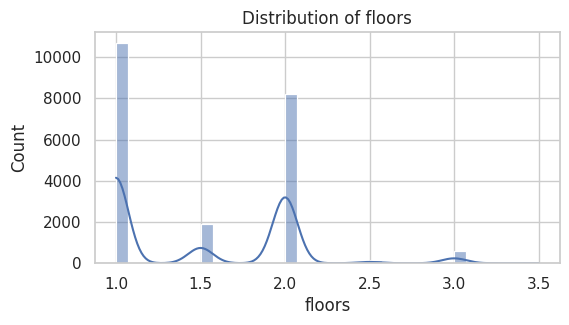

floors: p = 0.000 => Non-normal


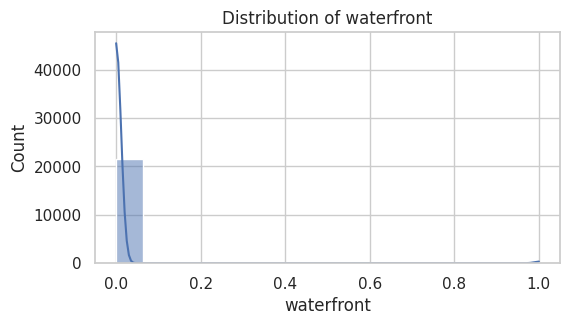

waterfront: p = 0.000 => Non-normal


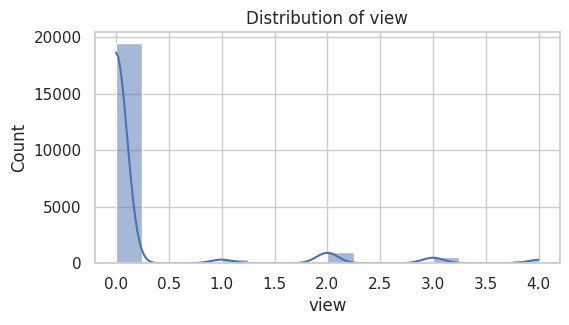

view: p = 0.000 => Non-normal


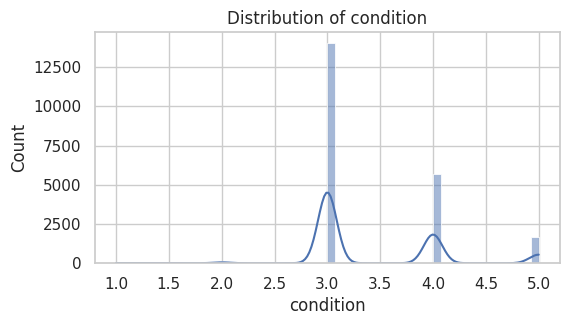

condition: p = 0.000 => Non-normal


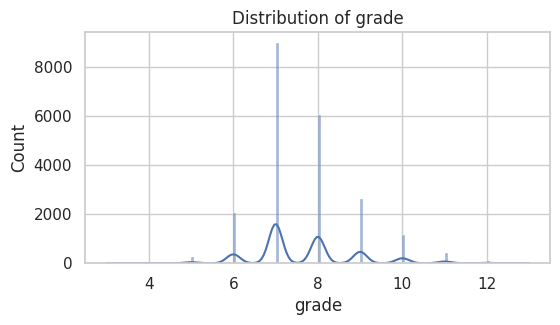

grade: p = 0.000 => Non-normal


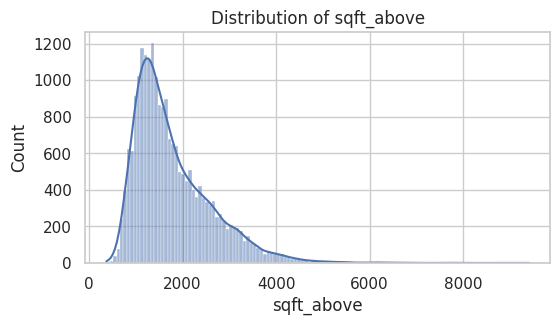

sqft_above: p = 0.000 => Non-normal


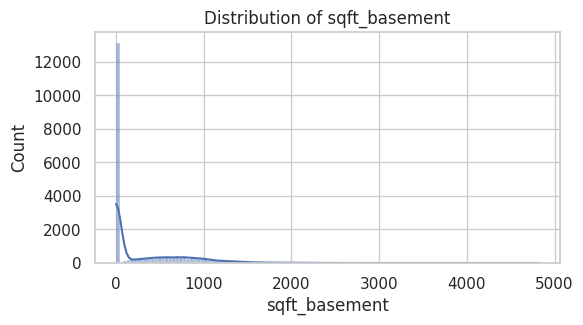

sqft_basement: p = 0.000 => Non-normal


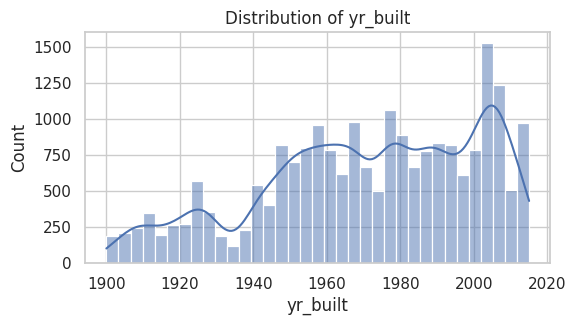

yr_built: p = 0.000 => Non-normal


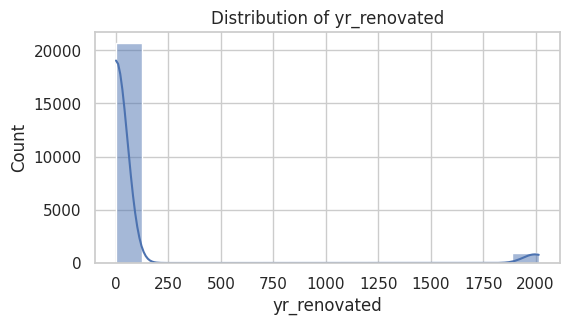

yr_renovated: p = 0.000 => Non-normal


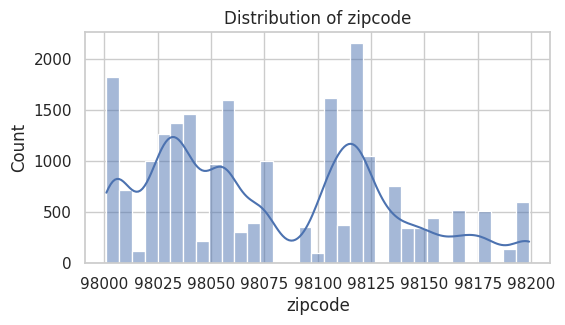

zipcode: p = 0.000 => Non-normal


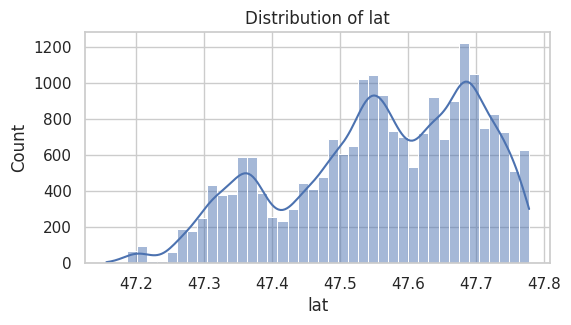

lat: p = 0.000 => Non-normal


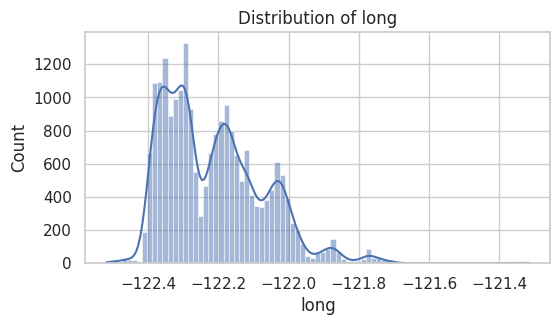

long: p = 0.000 => Non-normal


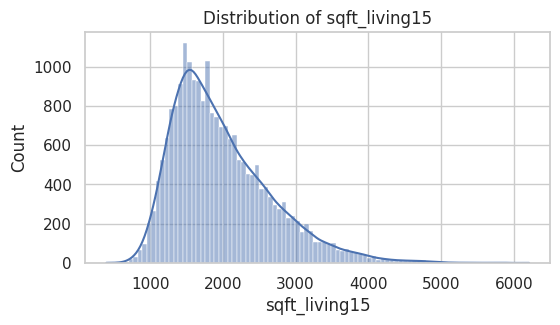

sqft_living15: p = 0.000 => Non-normal


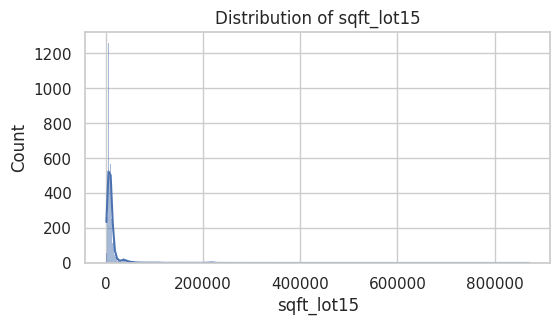

sqft_lot15: p = 0.000 => Non-normal

✅ Numeric Features Conclusion: Most are not normally distributed (right-skewed)


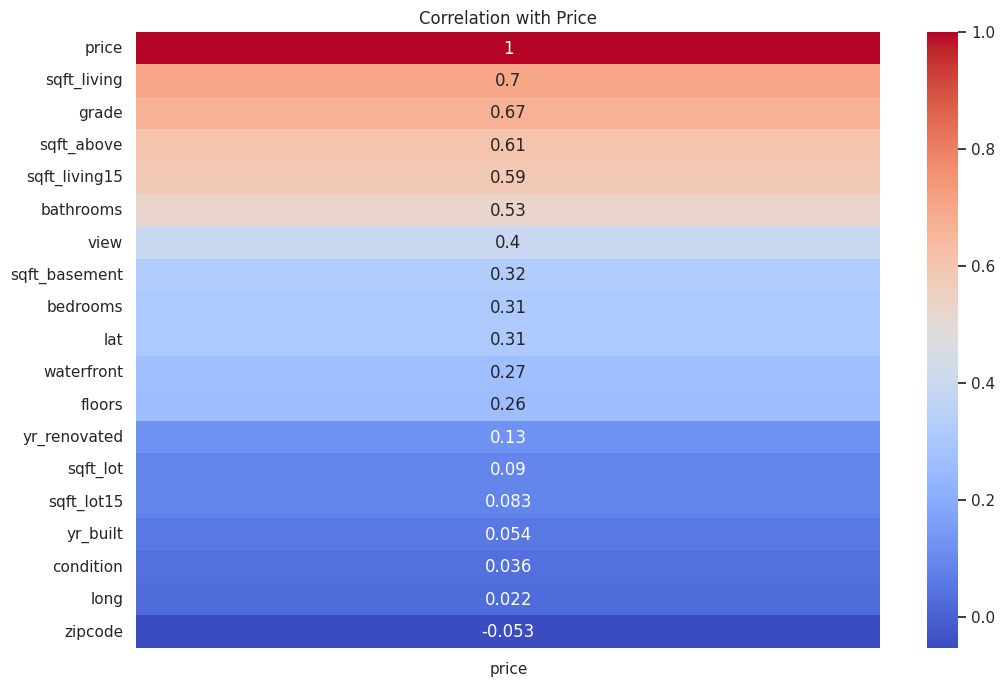

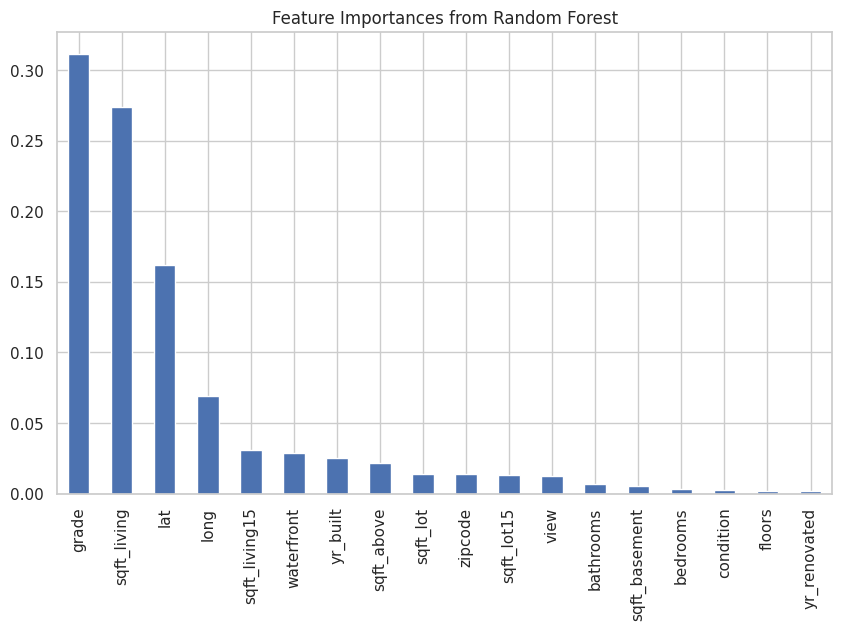

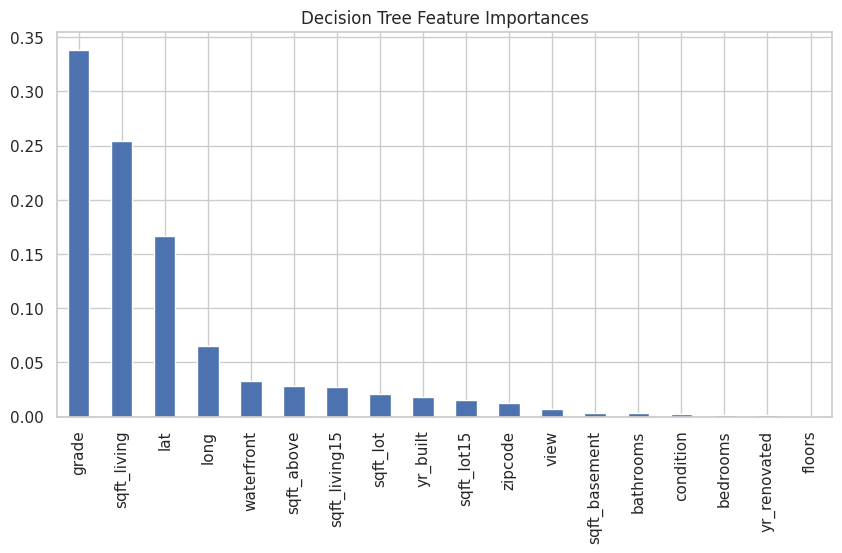


✅ Selected features by RFE:
['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long']


In [2]:
# 📦 Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from scipy import stats

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid")

# 📥 Load Dataset & Cleaning
df = pd.read_csv("/content/kc_house_data.csv")
df = df.drop_duplicates()
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]
df = df.drop(columns=['id', 'date'])

# 🎯 Features and Target
X = df.drop(columns='price')
y = df['price']

# 🔢 Numerical Features
num_features = X.select_dtypes(include=np.number).columns.tolist()
print("Numerical features:", num_features)

# 🧠 Categorical Features
cat_features = X.select_dtypes(include='object').columns.tolist()
print("Categorical features:", cat_features)

# 📈 Check Normality
print("\n--- Checking Normality of Numerical Features ---")
for col in num_features:
    plt.figure(figsize=(6,3))
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    k2, p = stats.normaltest(X[col])
    print(f"{col}: p = {p:.3f} => {'Non-normal' if p < 0.05 else 'Normal'}")

print("\n✅ Numeric Features Conclusion: Most are not normally distributed (right-skewed)")

# 📊 Correlation with Price
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Price")
plt.show()

# 🌲 Feature Importance with Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X, y)
rf_importances = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
rf_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.show()

# 🌳 Decision Tree Feature Importance
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X[num_features], y)
dt_importances = pd.Series(dtree.feature_importances_, index=num_features).sort_values(ascending=False)

plt.figure(figsize=(10,5))
dt_importances.plot(kind='bar')
plt.title("Decision Tree Feature Importances")
plt.show()

# 🔍 Recursive Feature Elimination (RFE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10)
selector = selector.fit(X_scaled, y)

rfe_features = pd.Series(selector.support_, index=X.columns)
selected_rfe = rfe_features[rfe_features == True].index.tolist()

print("\n✅ Selected features by RFE:")
print(selected_rfe)
